In [1]:
using EmceeGibbs
using Gadfly
using TestEmceeGibbs

 in depwarn at ./deprecated.jl:62
 in oldstyle_vcat_warning at ./abstractarray.jl:28
 in vect at abstractarray.jl:31
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:55
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:55
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:52
 in include_string at loading.jl:99
 in execute_request_0x535c5df2 at /Users/farr/.julia/v0.4/IJulia/src/execute_request.jl:157
 in eventloop at /Users/farr/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:365
whi

In [72]:
xsdet, xsndet = TestEmceeGibbs.draw()

([5.43906,3.10169,3.88268,4.88474,4.07564,3.1789,3.67552,2.79204,3.92227,2.90509  …  3.05166,4.58257,5.31145,7.25114,2.49648,3.35946,3.43676,3.45066,3.42236,3.5377],[2.90234,1.9519,2.34707,2.00466,2.3828,2.31485,1.85784,1.56984,2.13109,2.50955  …  2.74058,1.90097,1.97099,2.82221,2.06439,1.61572,2.58424,1.6316,2.56123,2.68056])

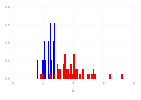

In [73]:
plot(layer(x=xsdet, Geom.histogram(density=true), Theme(default_color=color("red"))),
layer(x=xsndet, Geom.histogram(density=true), Theme(default_color=color("blue"))))

In [74]:
lnprob = TestEmceeGibbs.make_lnprob(xsdet)

lnprob (generic function with 1 method)

In [75]:
ps = zeros(3, 100)
for j in 1:100
    for i in 1:3
        ps[i,j] = TestEmceeGibbs.ptrue[i] + 1e-3*randn()
    end
end
gs = [TestEmceeGibbs.draw(exp(ps[1,i]), ps[2,i], exp(ps[3,i]))[2] for i in 1:100]

100-element Array{Any,1}:
 [3.48392,2.67192,3.17077,2.58295,2.85276,1.50441,2.0545,2.60403,1.44796,1.8398  …  2.30525,1.75307,1.75772,3.00996,1.3118,2.72117,1.47958,2.20821,3.18614,1.78736]   
 [1.58632,3.02628,2.40465,3.19692,2.24416,2.42861,2.93051,2.82173,2.69299,1.57668  …  2.48334,2.0464,2.28774,3.32235,3.05821,2.19784,2.36536,3.23886,3.21279,3.32917] 
 [2.75997,2.29467,2.22953,2.12478,2.30751,3.35073,2.5367,2.19604,2.79886,2.85139  …  1.78575,2.19741,2.04329,3.46045,2.9999,2.1598,2.71276,2.1943,2.81959,2.33615]    
 [4.00881,1.97932,1.30159,3.82456,2.71643,1.80776,2.1365,2.40398,2.85901,2.9427  …  2.38158,2.20344,3.16461,1.69973,3.46566,1.69277,2.66024,1.9258,2.04001,2.90165]   
 [2.49597,2.57941,2.31336,1.55018,2.71234,2.77117,3.04655,1.30944,3.82361,1.66973  …  3.02073,1.95749,1.5981,2.1954,2.87069,2.14658,2.45644,1.91487,2.46942,2.00616]  
 [2.38123,1.78099,2.78081,2.86358,3.1842,2.09715,3.19948,1.80145,2.24951,2.48741  …  3.19492,2.3994,1.35824,2.79188,1.91913,2.37304,2.45871

In [76]:
lnprobs = EmceeGibbs.lnprobs(ps, gs, lnprob)

100-element Array{Float64,1}:
 171.057
 175.672
 205.635
 172.15 
 158.391
 177.355
 158.492
 194.257
 152.522
 176.939
 202.324
 157.879
 159.135
   ⋮    
 192.219
 163.363
 172.368
 146.91 
 134.882
 170.16 
 192.017
 150.355
 161.525
 142.321
 167.991
 157.925

In [77]:
ps_new, gs_new, lnprobs_new = EmceeGibbs.update(ps, gs, lnprobs, lnprob, TestEmceeGibbs.gibbsupdate)

(
3x100 Array{Float64,2}:
  4.60546   4.6053    4.60502   4.60666  …   4.60355   4.60606   4.60385
  1.09927   1.09591   1.0988    1.09501      1.09966   1.09834   1.10088
 -1.09613  -1.09848  -1.09836  -1.10147     -1.09858  -1.09819  -1.09834,

Any[[2.35928,1.70217,2.38346,2.56178,1.82176,2.96303,2.64119,2.74196,2.85948,3.33116  …  3.23915,2.52976,2.23065,1.81537,2.09089,3.18198,2.32488,2.86616,3.38297,2.51773],[2.16722,2.91789,2.19531,1.68219,2.10394,2.05619,2.5409,2.86979,2.97396,2.27773  …  2.66924,3.11361,1.93718,1.54801,2.60987,2.75904,1.8757,3.0764,1.18613,2.23171],[2.92683,1.92639,3.13664,2.66742,2.58392,2.61973,2.39251,2.86116,3.19166,3.11624  …  2.41343,1.73138,2.85255,2.96274,3.10476,2.17309,2.05598,2.10619,3.18686,3.50183],[3.27699,1.40627,3.59657,1.72465,2.30134,1.81692,2.64655,2.54384,2.3245,2.45516  …  2.88533,2.05194,1.79774,2.92609,1.83474,2.74045,2.67252,2.49196,2.6575,2.6991],[3.17558,1.93853,2.67489,2.83134,2.5107,2.89939,2.70578,2.41778,2.19025,2.93558  …  2.37493

In [96]:
for i in 1:100
    ps_new, gs_new, lnprobs_new = EmceeGibbs.update(ps_new, gs_new, lnprobs_new, lnprob, TestEmceeGibbs.gibbsupdate)
end

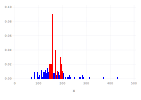

In [97]:
plot(layer(x=lnprobs, Geom.histogram(density=true), Theme(default_color=color("red"))),
layer(x=lnprobs_new, Geom.histogram(density=true), Theme(default_color=color("blue"))))

In [98]:
imax = 0
lnpmax = -Inf
for i in 1:100
    if lnprobs_new[i] > lnpmax
        lnpmax = lnprobs_new[i]
        imax = i
    end
end
imax

36

In [99]:
exp(ps_new[1,imax]), ps_new[2,imax], exp(ps_new[3,imax]), length(gs_new[imax])

(203.0886351466935,0.8583183399689285,0.4418153706517719,127)

In [100]:
pmean = zeros(3)
for i in 1:size(ps_new, 2)
    for j in 1:3
        pmean[j] += ps_new[j,i]
    end
end
pmean /= size(ps_new,2)
pmean

3-element Array{Float64,1}:
  4.50617
  1.10615
 -1.0698 

In [101]:
psig = zeros(3)
for i in 1:size(ps_new, 2)
    for j in 1:3
        psig[j] += (ps_new[j,i]-pmean[j])*(ps_new[j,i]-pmean[j])
    end
end
psig /= size(ps_new,2)
psig = sqrt(psig)

3-element Array{Float64,1}:
 0.217489
 0.102226
 0.149542

In [102]:
(pmean[1]-TestEmceeGibbs.ptrue[1])/psig[1], (pmean[2]-TestEmceeGibbs.ptrue[2])/psig[2], (pmean[3]-TestEmceeGibbs.ptrue[3])/psig[3]

(-0.45520896456767923,0.07375747381434952,0.1926504204101696)

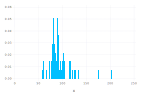

In [105]:
plot(x=exp(ps_new[1,:]), Geom.histogram(density=true))

In [107]:
pts = zeros(3, 100, 100)
for i in 1:100
    for j in 1:10
        ps_new, gs_new, lnprobs_new = EmceeGibbs.update(ps_new, gs_new, lnprobs_new, lnprob, TestEmceeGibbs.gibbsupdate)
    end
    pts[:,:,i] = ps_new
end

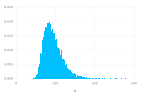

In [109]:
plot(x=exp(pts[1,:,:]), Geom.histogram(density=true))

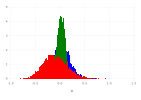

In [111]:
colors = [color("red"), color("green"), color("blue")]
layers = [layer(x=pts[i,:,:]-TestEmceeGibbs.ptrue[i], Geom.histogram(density=true), Theme(default_color=colors[i])) for i in 1:3]
plot(layers...)

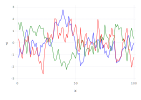

In [113]:
layers = Any[nothing for i in 1:3]
colors = [color("red"), color("green"), color("blue")]
for i in 1:3
    means = zeros(100)
    for j in 1:100
        means[j] = mean(pts[i,:,j])
    end
    mu = mean(means)
    sigma = std(means)
    layers[i] = layer(x=collect(1:100), y=(means-mu)/sigma, Geom.line, Theme(default_color=colors[i]))
end
plot(layers...)

In [122]:
TestEmceeGibbs.testall()